# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/cafe.png?raw=true" width=800, align="left"/>

- 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
- 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
- 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

# [미션 4] 구별 업종등록 데이터 분석

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [4]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [6]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [9]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### 기본 데이터: 1.4 seoul_business_type.csv

- 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    - 택시 운송업 (개인택시 등록자 주거지)
    - 한식일반음식점업
    - 용달 화물자동차 운송업(개인용달 등록자 주거지)
    - 부동산 중개 및 대리업
    - 두발미용업
    - 커피전문점
    - 남녀용 겉옷 및 셔츠 도매업
    - 기타주점업
    - 일반 교과 학원
    - 한식 육류요리 전문점

---

# 1. 데이터 불러오기

- 분석 대상 데이터를 불러와 데이터프레임으로 선언합니다.

### [참고] 데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)

- csv: pd.read_csv('파일이름.csv')
- txt: pd.read_csv('파일이름.csv', sep='구분자')
- xlsx: pd.read_excel('파일이름.xlsx')
- pickle: pd.read_pickle('파일이름.pkl')

## [실습1] 데이터 불러오기

- 대상 파일: 1.4 seoul_business_type.csv
- 불러온 데이터는 seoul_business 데이터프레임으로 선언하세요.
- 데이터 불러올 때 참고할 사항 
    - 구분자(sep)는 ',' 입니다
    - UTF-8 인코더를 사용해 주세요

In [15]:
# 데이터 불러오기
seoul_business = pd.read_csv(path + '1.4 seoul_business_type.csv', sep=',', encoding='UTF-8')

# 확인
seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


---

# 2. 기본 정보 확인 및 전처리

- 분석 대상 테이터를 탐색하고 적절한 전처리를 수행합니다.

## [실습2] 기본 정보 확인

- seoul_business 데이터프레임 정보를 확인하세요.
- head(), tail(), info(), describe() 메서드 등을 활용해 보세요.

In [19]:
# tail() 메서드로 하위 데이터 확인
seoul_business.tail()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
20,관악구,2027,3689,1600,2136,1604,2049,190,1672,1230,1628
21,서초구,903,6712,411,2758,1832,3897,1563,1255,3812,2338
22,강남구,2517,11486,487,6508,6255,7273,8320,2528,9020,5008
23,송파구,4850,5760,1931,3190,2328,3372,2830,1469,4160,2781
24,강동구,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459


In [21]:
# info() 메서드로 열 이름, 데이터 개수, 데이터 형식 등 확인
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   자치구              25 non-null     object
 1   택시운송업            25 non-null     int64 
 2   한식 일반 음식점업       25 non-null     int64 
 3   용달 화물자동차 운송업     25 non-null     int64 
 4   부동산 중개 및 대리업     25 non-null     int64 
 5   두발미용업            25 non-null     int64 
 6   커피전문점            25 non-null     int64 
 7   남녀용 겉옷 및 셔츠 도매업  25 non-null     int64 
 8   기타주점업            25 non-null     int64 
 9   일반 교과 학원         25 non-null     int64 
 10  한식 육류요리 전문점      25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [23]:
# describe() 메서드로 기술통계정보 확인
seoul_business.describe()

,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
count,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3068.040000,4007.32000,1174.240000,1705.44000,1448.560000,2292.880000,2044.640000,1254.840000,2030.920000,1786.120000
std,1963.159772,2132.72849,482.591639,1163.42057,1090.730645,1452.869383,4921.994987,502.206936,1952.686246,854.764359
min,215.000000,2009.00000,333.000000,794.00000,480.000000,837.000000,43.000000,477.000000,175.000000,943.000000
25%,1838.000000,2663.00000,829.000000,1152.00000,891.000000,1375.000000,190.000000,955.000000,1045.000000,1184.000000
50%,2589.000000,2987.00000,1293.000000,1364.00000,1245.000000,1748.000000,700.000000,1165.000000,1463.000000,1545.000000
75%,4850.000000,4705.00000,1566.000000,1903.00000,1443.000000,3295.000000,1433.000000,1469.000000,2104.000000,2121.000000
max,6922.000000,11486.00000,1931.000000,6508.00000,6255.000000,7273.000000,24248.000000,2559.000000,9020.000000,5008.000000


## [실습3] 주요 업종 선택

- 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종만을 선택합니다.
- 단, '자치구' 열은 꼭 포함해야 합니다.
    - 예: '자치구', '한식 일반 음식점업', '커피전문점', '기타주점업' 
- seoul_business 데이터프레임이 위에서 선택한 열만 갖도록 변경하세요.

In [27]:
# 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종
# df = df[['열1', '열2', '열3']] 형태의 구문 사용
seoul_business = seoul_business[['자치구', '한식 일반 음식점업', '커피전문점', '기타주점업', '일반 교과 학원']]

# 확인
seoul_business

,자치구,한식 일반 음식점업,커피전문점,기타주점업,일반 교과 학원
0,종로구,5912,3613,1413,382
1,중구,6414,3542,982,175
2,용산구,2987,2076,1332,573
3,성동구,2785,1859,621,1494
4,광진구,2861,1887,1577,1646
5,동대문구,3566,1472,1082,984
6,중랑구,2479,1037,1000,1045
7,성북구,2822,1384,1030,1755
8,강북구,2663,1095,1275,740
9,도봉구,2009,837,477,1162


- seoul_business 데이터프레임을 df_seoul_business.csv 파일로 저장하세요.

In [29]:
# csv 파일로 저장 (파일명: df_seoul_business.csv)
# 참고: to_csv() 메서드를 사용, index=False 지정 
seoul_business.to_csv(path + 'df_seoul_business.csv', index=False)

---

# 3. 데이터 분석

- 다양한 분석 과정을 통해 인사이트를 도출하세요.

## [실습4] 시각화 분석

- 다양한 열를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

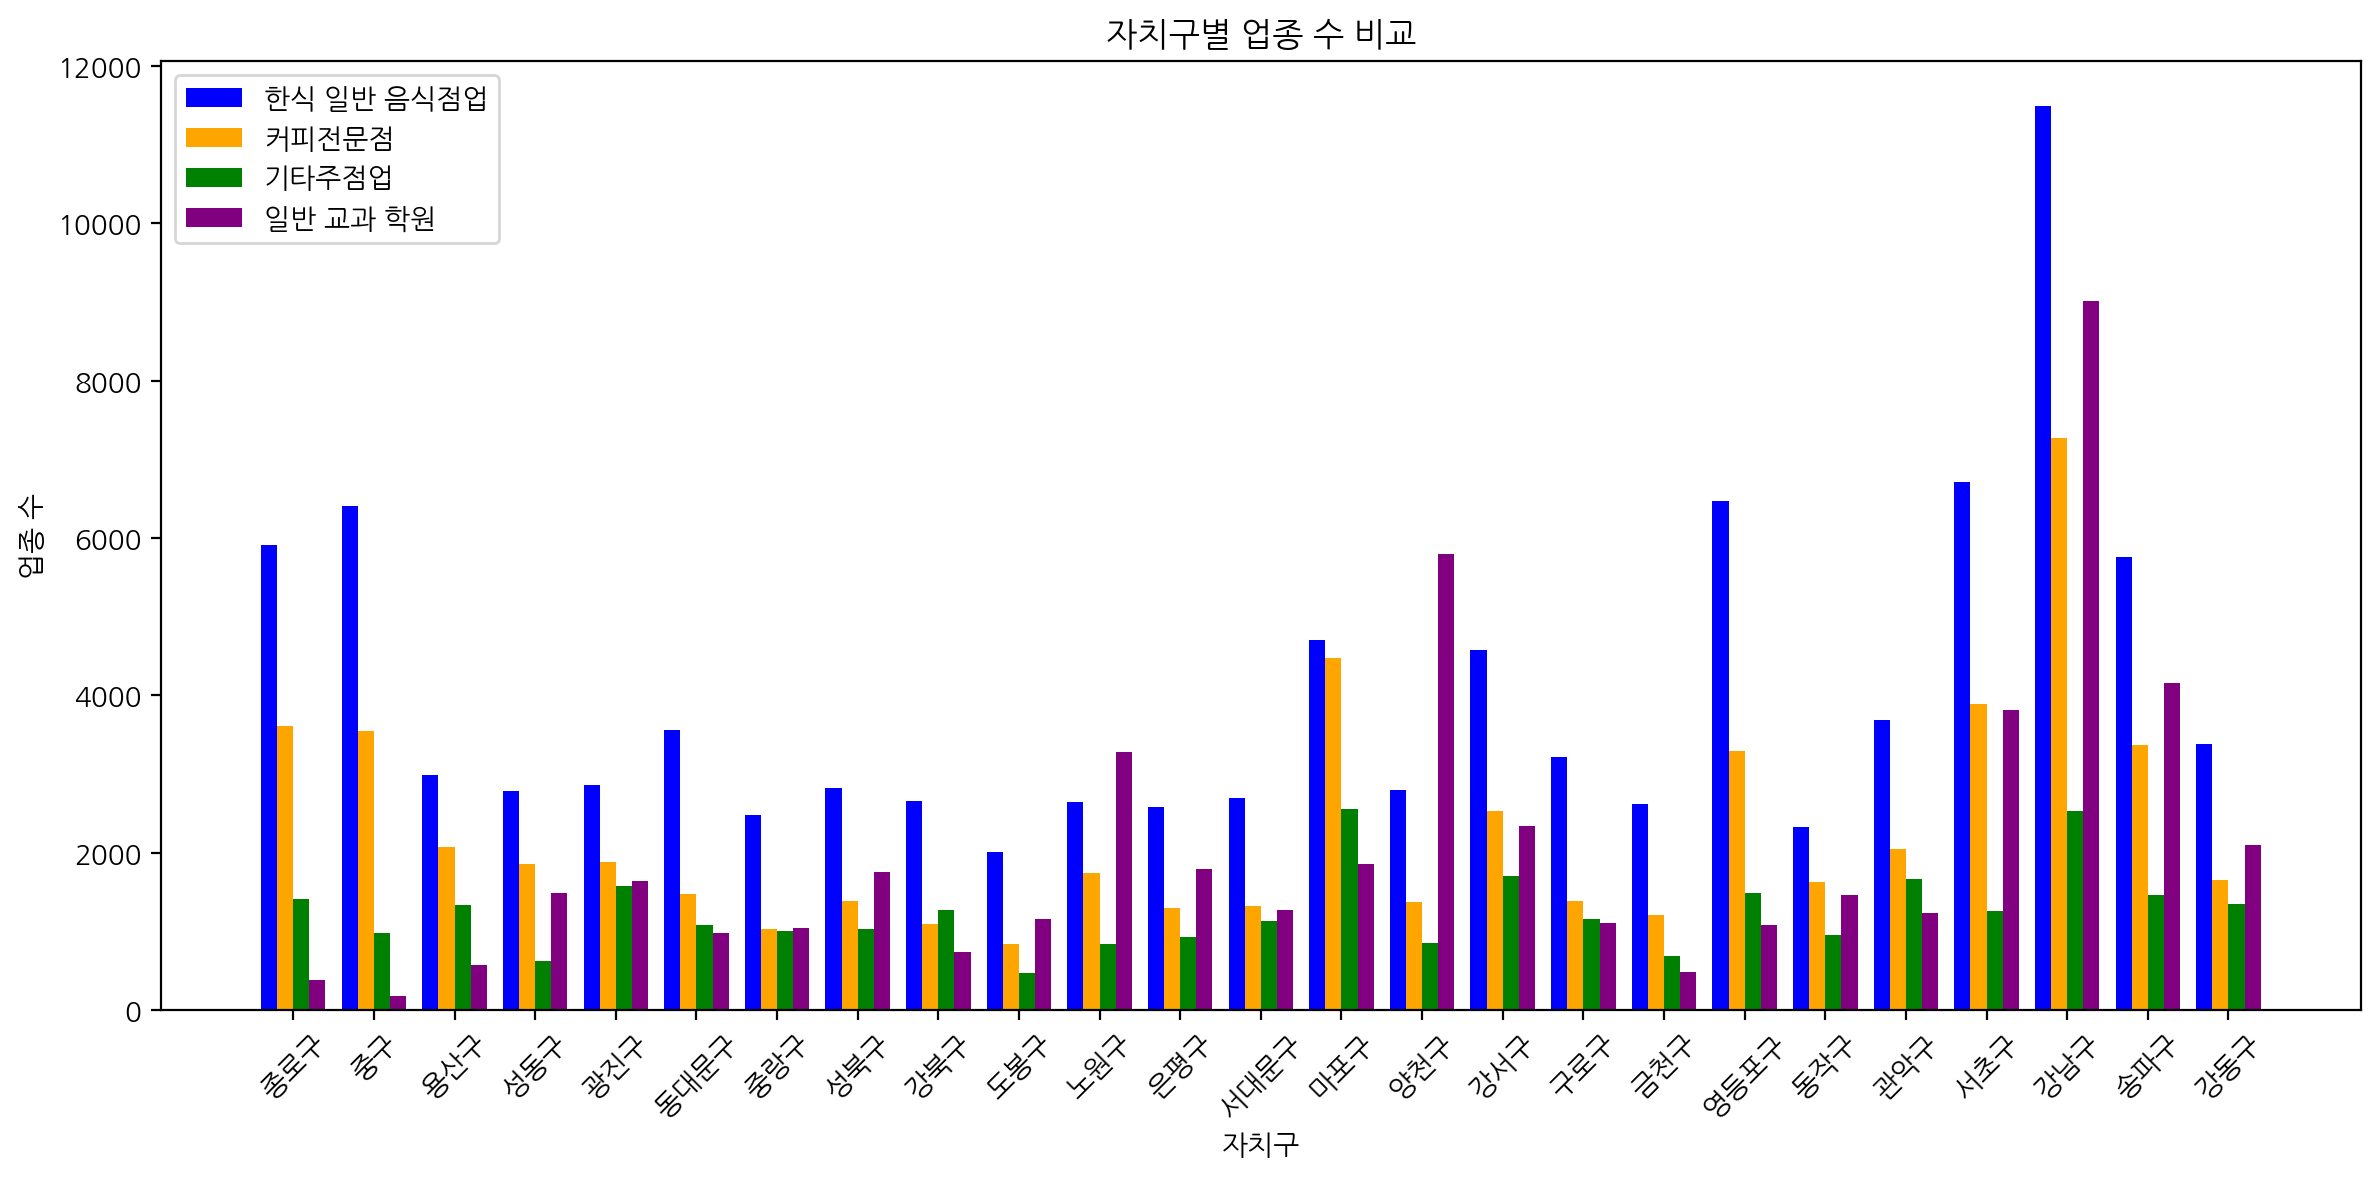

In [41]:
plt.figure(figsize=(12, 6))

# 각 업종의 인구 수 비교 바 차트
bar_width = 0.2
x = range(len(seoul_business['자치구']))

# 바 차트 생성
plt.bar(x, seoul_business['한식 일반 음식점업'], width=bar_width, label='한식 일반 음식점업', color='blue', align='center')
plt.bar([i + bar_width for i in x], seoul_business['커피전문점'], width=bar_width, label='커피전문점', color='orange', align='center')
plt.bar([i + bar_width * 2 for i in x], seoul_business['기타주점업'], width=bar_width, label='기타주점업', color='green', align='center')
plt.bar([i + bar_width * 3 for i in x], seoul_business['일반 교과 학원'], width=bar_width, label='일반 교과 학원', color='purple', align='center')

# 그래프 제목 및 레이블 설정
plt.title('자치구별 업종 수 비교')
plt.xlabel('자치구')
plt.ylabel('업종 수')
plt.xticks([i + bar_width * 1.5 for i in x], seoul_business['자치구'])  # x축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

# 한식 일반 음식점업 < 일반 교과 학원: 양천구, 

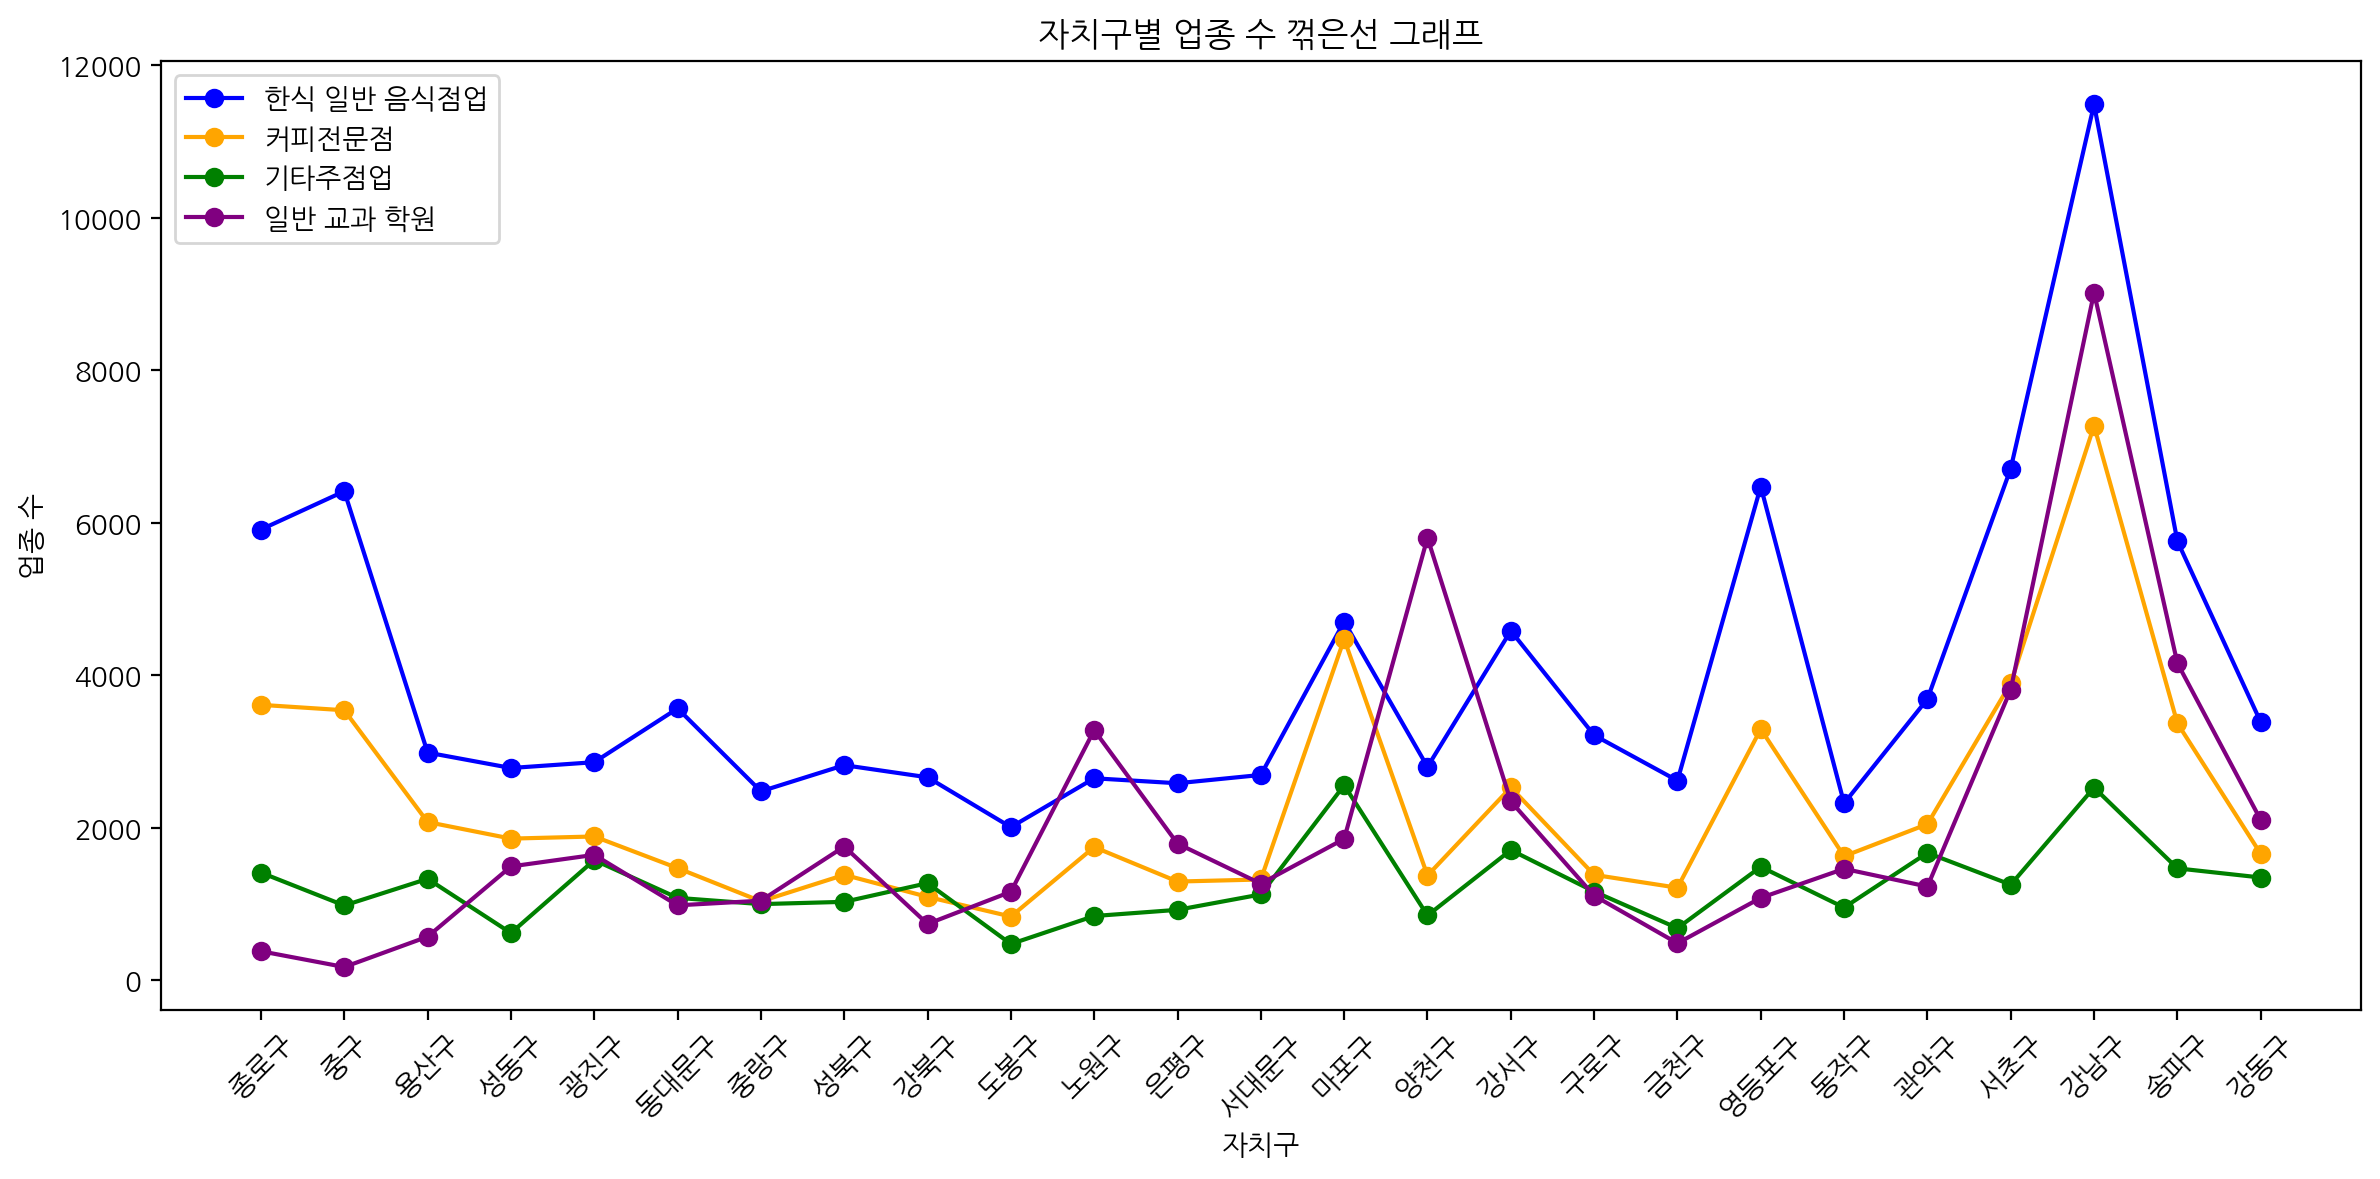

In [39]:

# 꺾은선 그래프
plt.figure(figsize=(12, 6))

# 각 업종의 인구 수 꺾은선 그래프
plt.plot(seoul_business['자치구'], seoul_business['한식 일반 음식점업'], marker='o', label='한식 일반 음식점업', color='blue')
plt.plot(seoul_business['자치구'], seoul_business['커피전문점'], marker='o', label='커피전문점', color='orange')
plt.plot(seoul_business['자치구'], seoul_business['기타주점업'], marker='o', label='기타주점업', color='green')
plt.plot(seoul_business['자치구'], seoul_business['일반 교과 학원'], marker='o', label='일반 교과 학원', color='purple')

# 그래프 제목 및 레이블 설정
plt.title('자치구별 업종 수 꺾은선 그래프')
plt.xlabel('자치구')
plt.ylabel('업종 수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해 보세요.


